<a href="https://colab.research.google.com/github/gunavarshitha/CV-Smart-Interaction/blob/main/CV_Smart_Interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 115MB/s]



Select input source:
1 - Webcam
2 - Image File
3 - Video File
Enter your choice (1/2/3): 2
Enter image file path: /content/test.jpeg

0: 640x448 6 bowls, 71.8ms
Speed: 13.3ms preprocess, 71.8ms inference, 427.8ms postprocess per image at shape (1, 3, 640, 448)


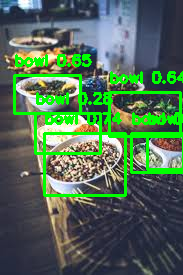

In [2]:
import cv2
import os
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

model = YOLO("yolov8n.pt")

def detect_objects(frame):
    results = model(frame)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            label = model.names[cls]
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return frame

def process_webcam():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: Could not access webcam.")
        return
    print("Press 'Q' to exit.")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break
        frame = detect_objects(frame)
        cv2.imshow("YOLOv8 - Webcam", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

def process_image(image_path):
    if not os.path.exists(image_path):
        print(f"Error: File '{image_path}' not found.")
        return
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image.")
        return
    image = detect_objects(image)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def process_video(video_path):
    if not os.path.exists(video_path):
        print(f"Error: File '{video_path}' not found.")
        return
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not load video.")
        return
    print("Processing video... Press 'Q' to stop.")
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = detect_objects(frame)
        cv2.imshow("YOLOv8 - Video", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

print("\nSelect input source:")
print("1 - Webcam")
print("2 - Image File")
print("3 - Video File")
choice = input("Enter your choice (1/2/3): ")

if choice == "1":
    process_webcam()
elif choice == "2":
    image_path = input("Enter image file path: ").strip()
    process_image(image_path)
elif choice == "3":
    video_path = input("Enter video file path: ").strip()
    process_video(video_path)
else:
    print("Invalid choice! Exiting...")